# **모델 성능 관리**

<center><img src = "https://github.com/Jangrae/img/blob/master/computing.jpg?raw=true" width=800/></center>

## **1. 환경 준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

### (2) 함수 만들기

In [2]:
# 함수 만들기
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss', marker='.')
    plt.plot(history['val_loss'], label='Validation Loss', marker='.')

    plt.title('Learning Curve', size=15, pad=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

### (3) 데이터 준비

- 과적합을 위한 예제 데이터입니다.
    - target
    - feature: 0 ~ 299

In [3]:
# 데이터 준비
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/overfit_sample.csv'
data = pd.read_csv(path)
data.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [4]:
# 크기 확인
print(data.shape)

(250, 301)


## **2. Early Stopping**

### (1) 데이터 전처리

#### 1) 데이터 준비

In [5]:
# x, y 분리
target = 'target'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 데이터 분할

In [6]:
# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

#### 3) 스케일링

In [7]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

#### 1) 모델 선언

In [8]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [9]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [10]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

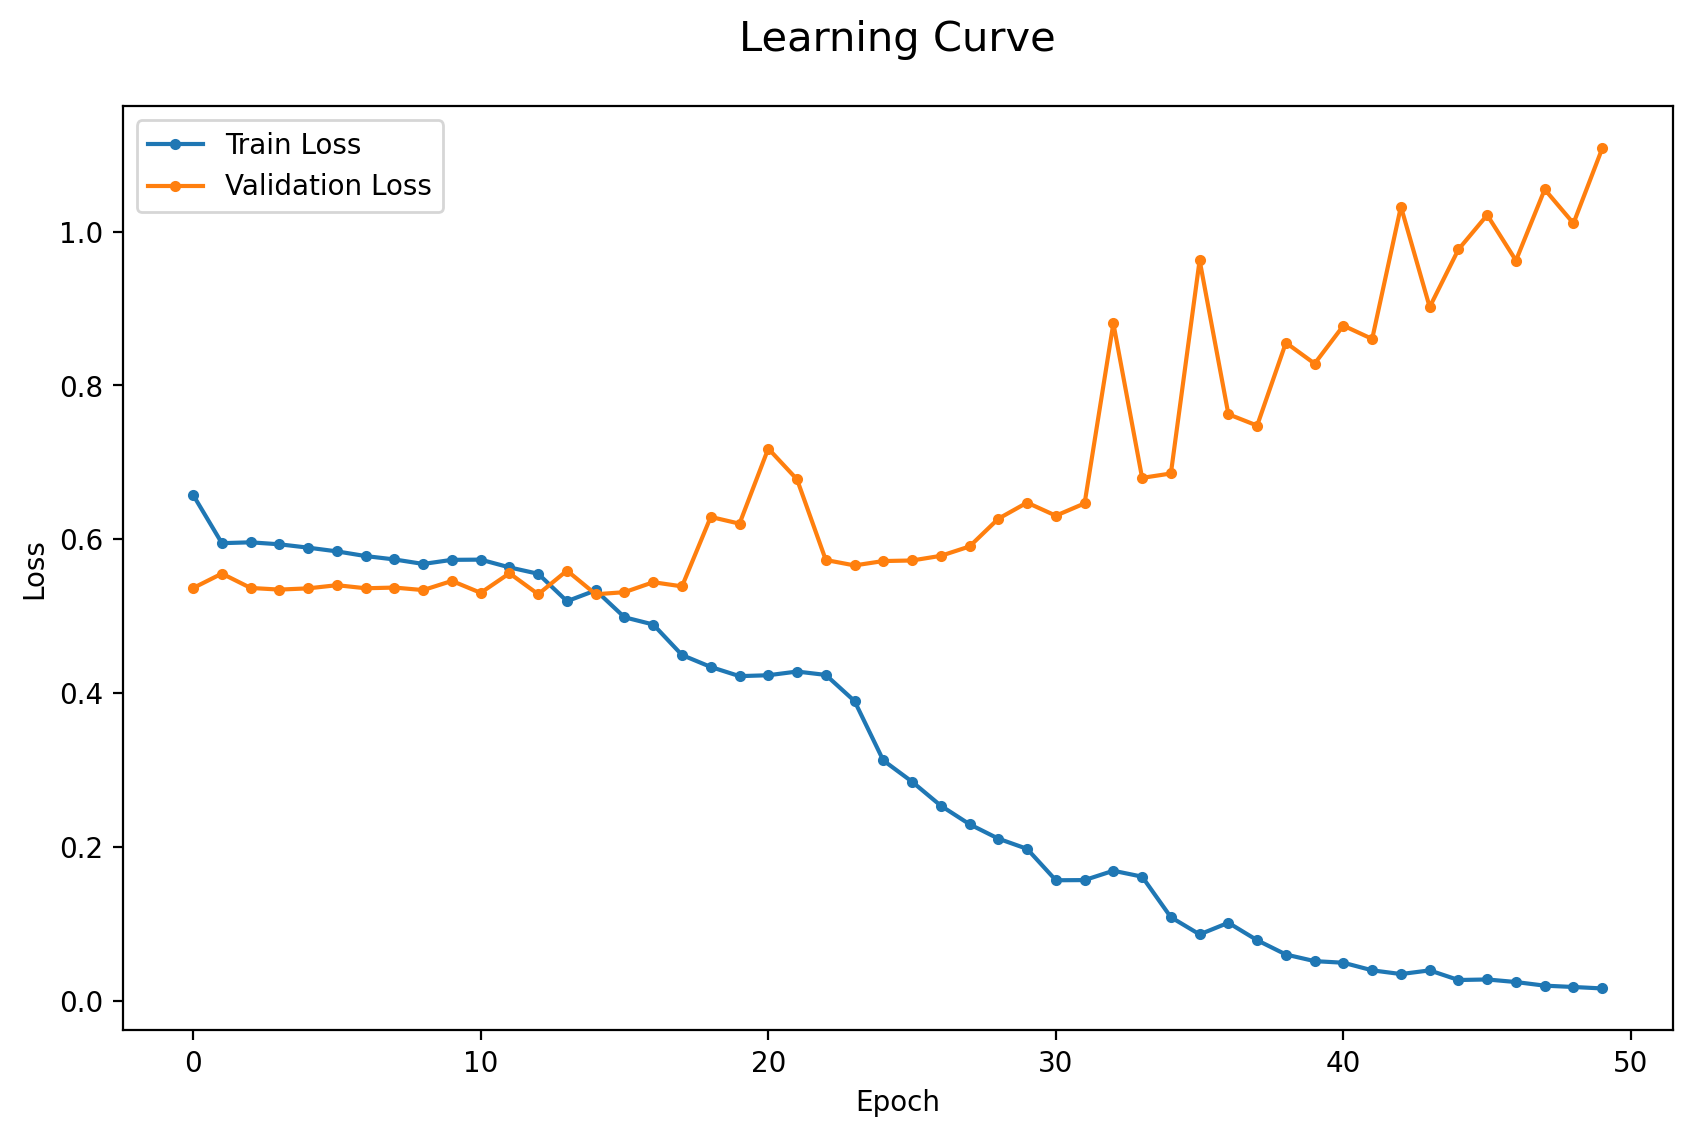

In [11]:
# 학습 곡선
dl_history_plot(hist)

### (3) 미리 멈춤(Early Stopping)

#### 1) 함수 불러오기

In [12]:
# 함수 불러오기
from tensorflow.keras.callbacks import EarlyStopping

#### 2) 모델 선언

In [13]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 3) 모델 학습

- **monitor='val_loss'**
    - 어떤 값을 감시할지 지정하는 옵션입니다.
    - val_loss가 개선(=감소)되고 있는지를 기준으로 early stopping을 판단합니다.
- **min_delta=0.01**
    - '변화량 최소 기준'입니다.
    - 즉, val_loss가 직전보다 0.01 이상 좋아지지 않으면, '개선이 없다'고 판단합니다.
- **patience=10**
    - '얼마나 참을지' 설정하는 옵션입니다.
    - val_loss가 min_delta 기준으로 개선되지 않더라도, 최대 10번 epoch 동안은 기다려 줍니다.
    - 10번 연속으로 개선이 없으면 그때 학습을 조기 종료합니다.
- 결국, Validation Loss가 0.01 이상 좋아지지 않으면 개선으로 안 보고, 최대 10 Epoch 동안 개선이 없으면 학습을 멈춥니다.

In [14]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1)

In [15]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[es], verbose=1).history

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.7245 - val_loss: 0.5543
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5992 - val_loss: 0.5418
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5976 - val_loss: 0.5453
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5942 - val_loss: 0.5436
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5814 - val_loss: 0.5554
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5843 - val_loss: 0.5619
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5860 - val_loss: 0.5489
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5787 - val_loss: 0.5567
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5679 - val_loss: 0.5487
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5608 - val_loss: 0.5528
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5569 - val_loss: 0.5622
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5598 - val_loss: 0.5450
E

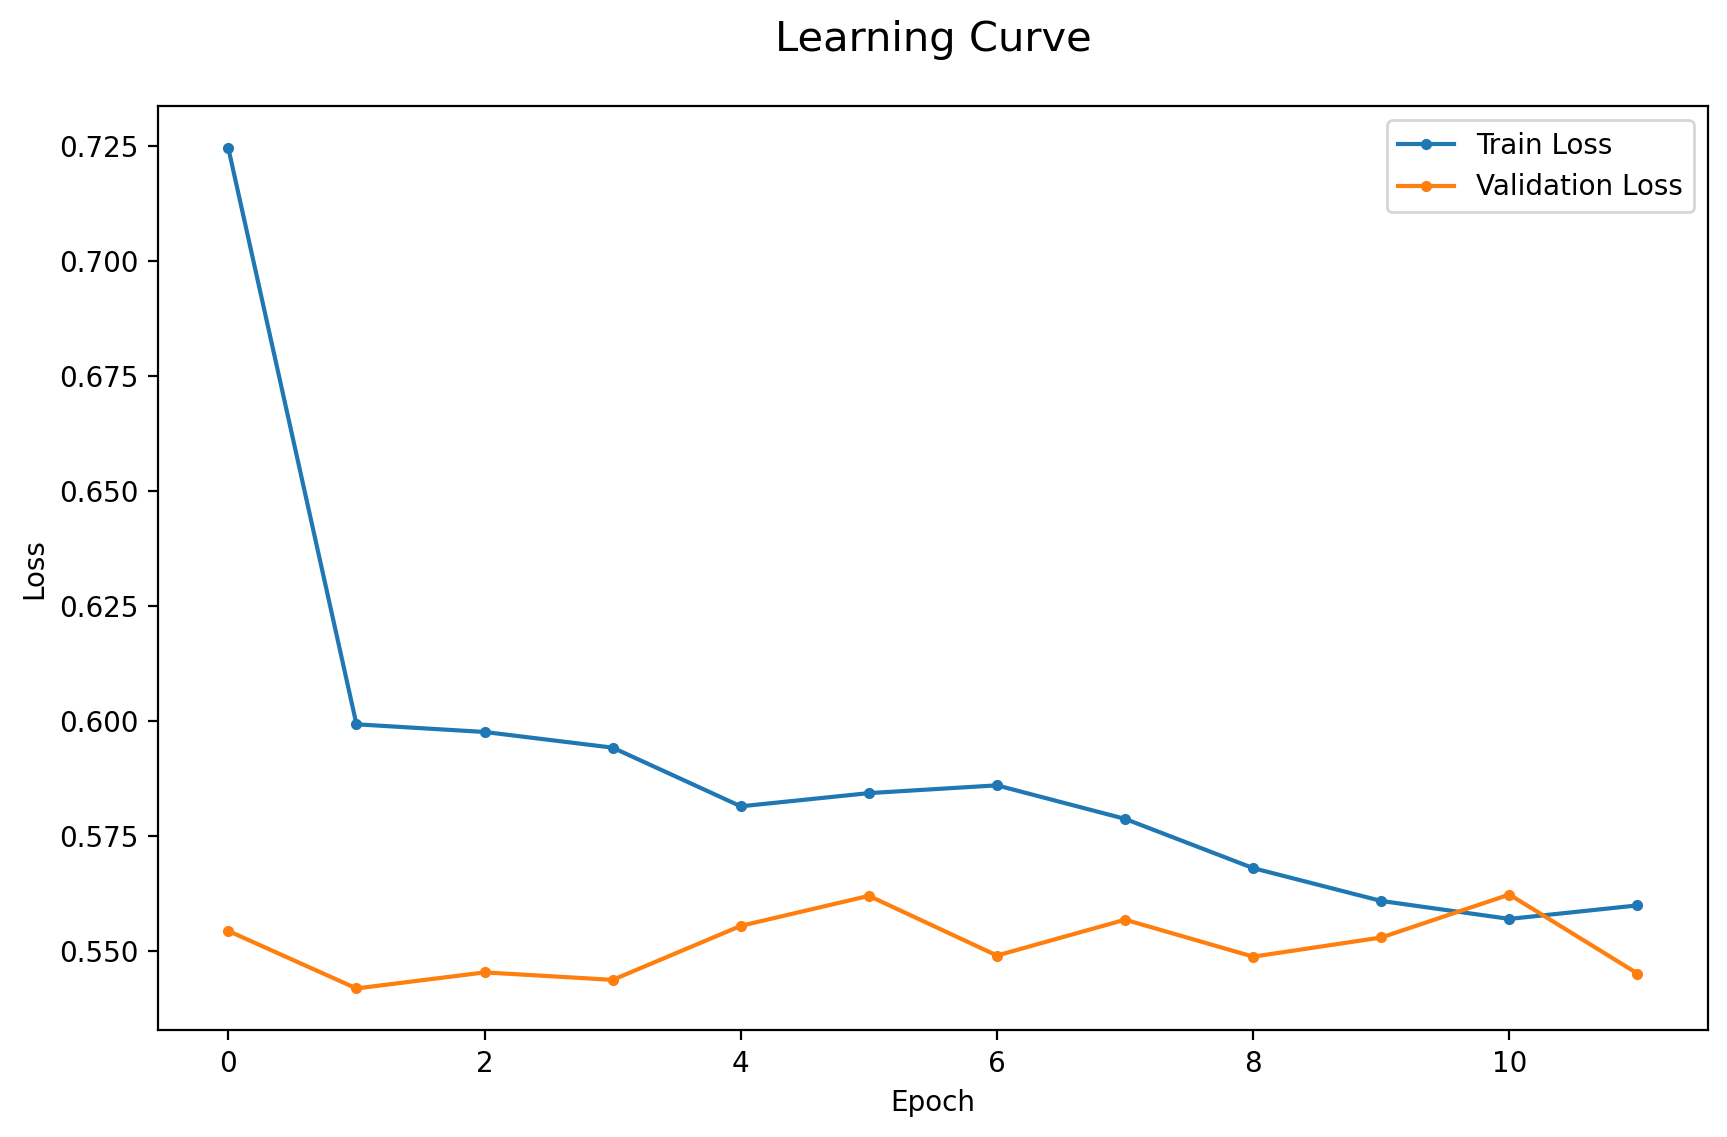

In [16]:
# 학습 곡선
dl_history_plot(hist)

## **3. Dropout**

In [17]:
# 함수 불러오기
from tensorflow.keras.layers import Dropout

### (1) 적용 전

#### 1) 모델 선언

In [18]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [19]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [20]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

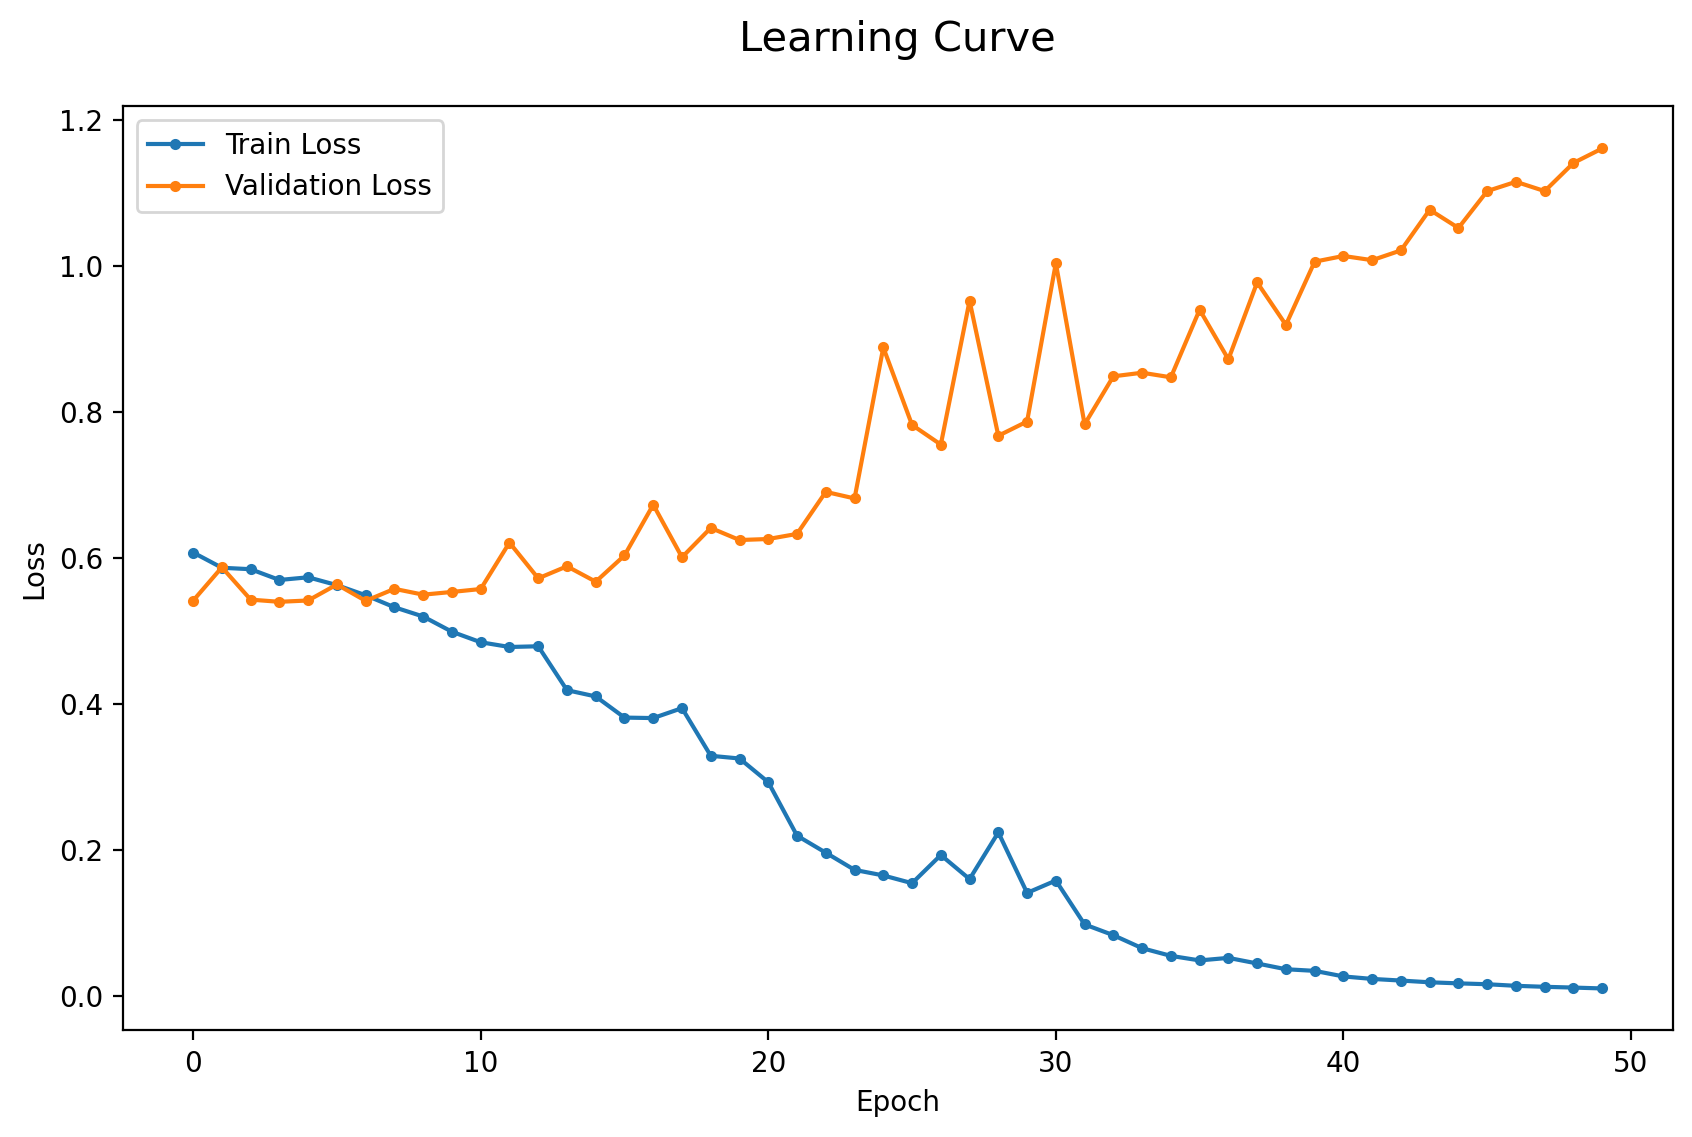

In [21]:
# 학습 곡선
dl_history_plot(hist)

### (2) 적용 후

#### 1) 모델 선언

In [22]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [23]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [24]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

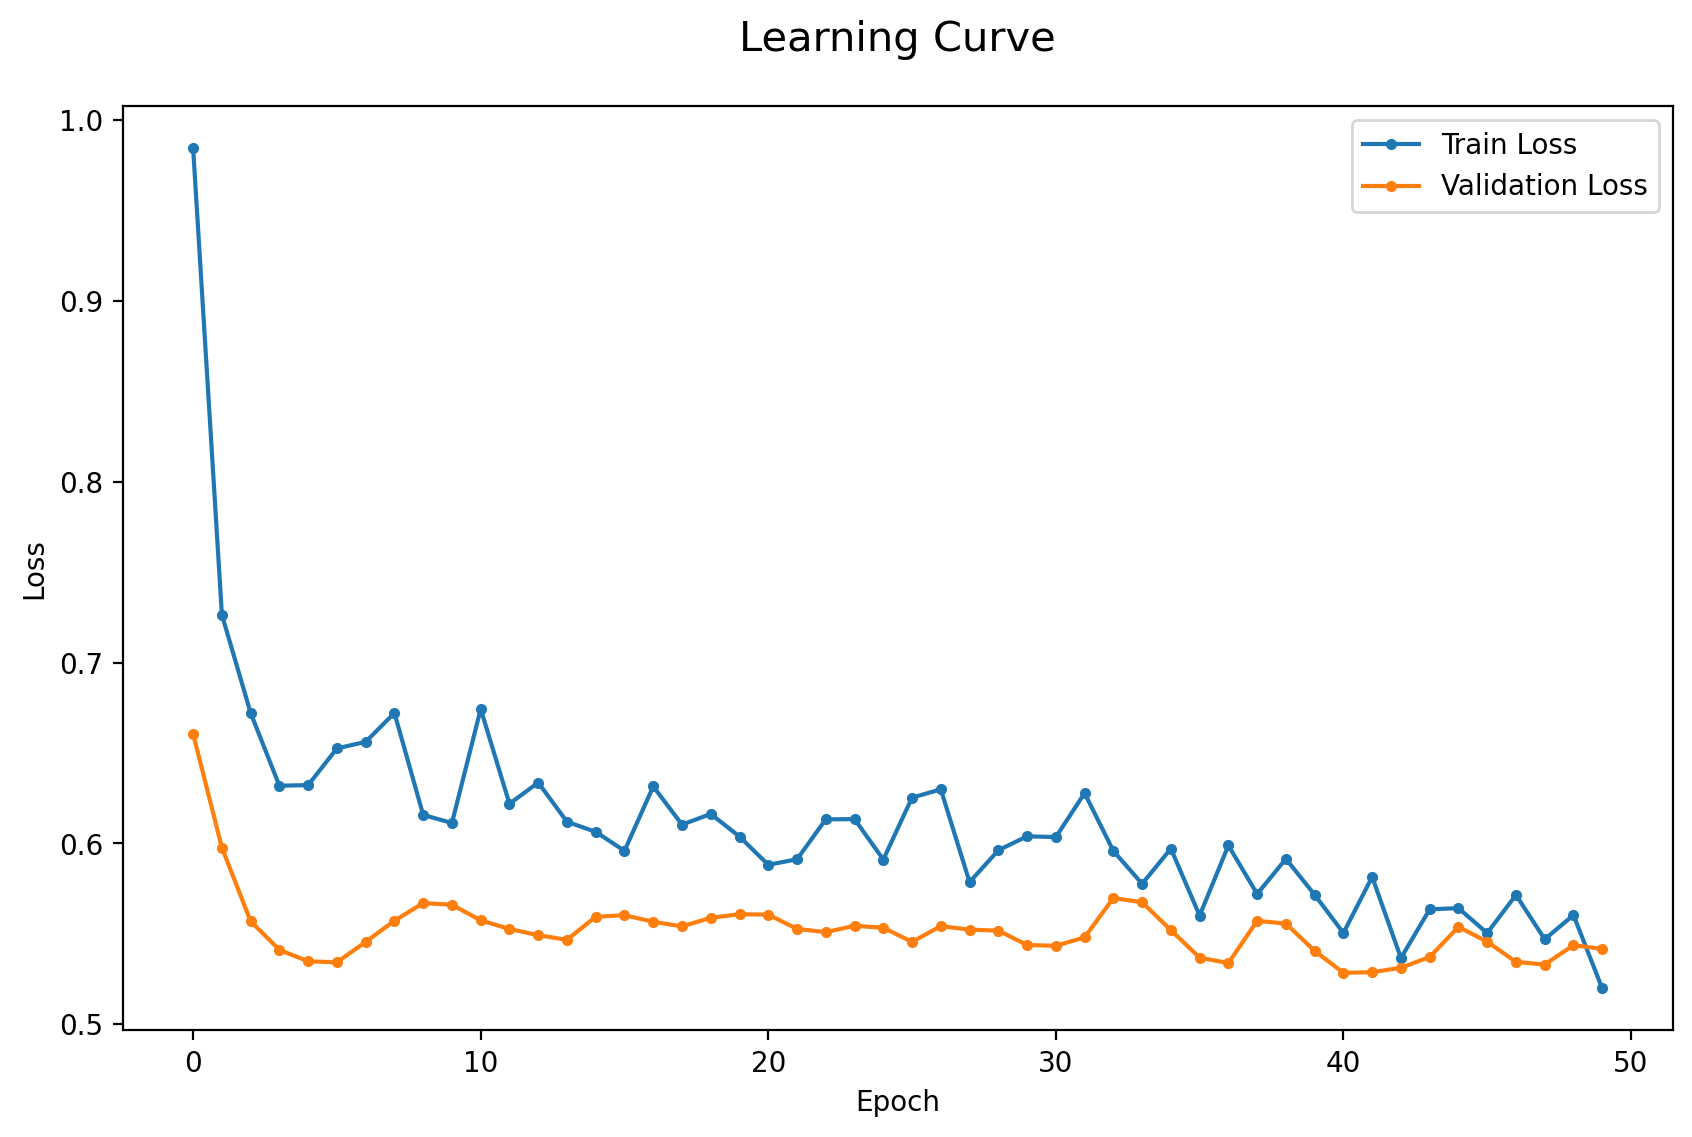

In [25]:
# 학습 곡선
dl_history_plot(hist)

## **4. 모델 저장하기**

### (1) 모델 저장하기

- model.save(‘파일이름.keras’)
- 딥러닝 모델의 메서드로 .save()가 제공됩니다.

In [26]:
# 모델 저장
model.save('model.keras')

- 저장된 파일은 왼쪽 '파일'탭에서 확인이 가능합니다.
- 저장된 파일을 다운로드 받을 수 있습니다.

### (2) 모델 불러오기

- load_model() 함수는 별도로 불러와야 합니다.
- 경로를 맞춰주고 .keras 파일을 읽어오면 그대로 사용 가능합니다.

In [27]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model1 = load_model('model.keras')

- 불러온 모델로 예측하고 성능을 평가해봅니다.

In [28]:
# 예측
pred = model1.predict(x_val)
pred = np.where(pred > 0.5, 1, 0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [29]:
# 성능 평가
print(confusion_matrix(y_val, pred))
print('-' * 53)
print(classification_report(y_val, pred, zero_division=0))

[[56  0]
 [19  0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        56
           1       0.00      0.00      0.00        19

    accuracy                           0.75        75
   macro avg       0.37      0.50      0.43        75
weighted avg       0.56      0.75      0.64        75



### (3) 중간 체크포인트에 모델 저장하기

- 우선 다음 구문을 실행해 위에서 저장한 파일들을 모두 제거합니다.

In [30]:
import os

def delete_keras_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.keras'):
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
                print(f'Deleted: {file_path}')
            except Exception as e:
                print(f'Error deleting {file_path}: {e}')

# 삭제할 디렉토리 지정
# directory_to_delete_from = './check/'
directory_to_delete_from = '.'

# 확장자가 .keras인 파일 삭제
delete_keras_files(directory_to_delete_from)

Deleted: .\model.keras


#### 1) 체크포인트 함수 불러오기

In [31]:
# 함수 불러오기
from tensorflow.keras.callbacks import ModelCheckpoint

#### 2) 모델 선언

In [ ]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 3) 모델 학습

- 아래 코드에서 ModelCheckpoint 콜백은 검증 데이터의 손실(val_loss)을 기준으로 모델을 저장합니다.
- 모델의 성능이 이전에 저장된 모델보다 향상될 때만 저장되도록 save_best_only=True로 설정합니다.
- 또한, ModelCheckpoint() 함수에 verbose=1로 설정하면 모델이 저장될 때마다 콘솔에 메시지가 표시됩니다.

In [33]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# 체크포인트 저장 설정
# model_path = './check/{epoch:03d}.keras'
model_path = './check/{epoch:03d}-{val_loss:.5f}.keras'
mcp = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [34]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[mcp], verbose=0).history


Epoch 1: val_loss improved from None to 0.54771, saving model to ./check/001-0.54771.keras

Epoch 2: val_loss did not improve from 0.54771

Epoch 3: val_loss improved from 0.54771 to 0.54608, saving model to ./check/003-0.54608.keras

Epoch 4: val_loss did not improve from 0.54608

Epoch 5: val_loss did not improve from 0.54608

Epoch 6: val_loss did not improve from 0.54608

Epoch 7: val_loss improved from 0.54608 to 0.54445, saving model to ./check/007-0.54445.keras

Epoch 8: val_loss did not improve from 0.54445

Epoch 9: val_loss improved from 0.54445 to 0.54216, saving model to ./check/009-0.54216.keras

Epoch 10: val_loss did not improve from 0.54216

Epoch 11: val_loss did not improve from 0.54216

Epoch 12: val_loss did not improve from 0.54216

Epoch 13: val_loss improved from 0.54216 to 0.54084, saving model to ./check/013-0.54084.keras

Epoch 14: val_loss did not improve from 0.54084

Epoch 15: val_loss did not improve from 0.54084

Epoch 16: val_loss did not improve from 0

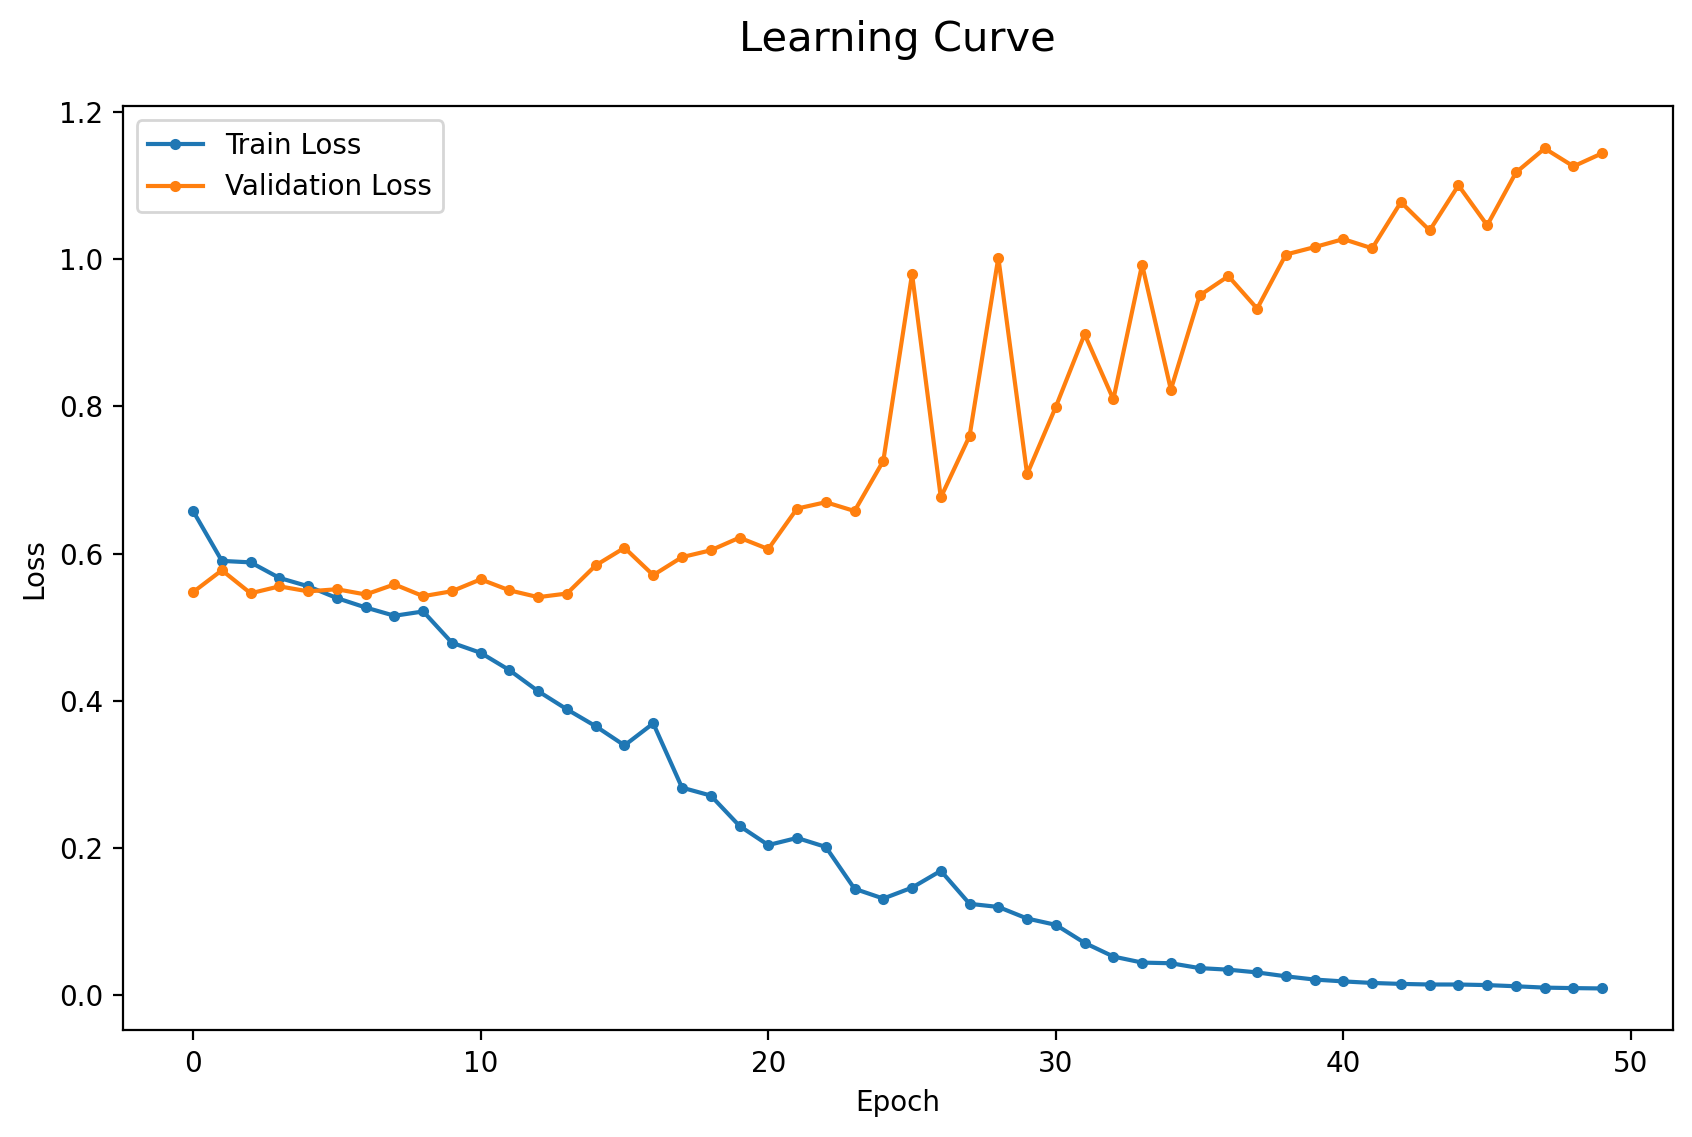

In [35]:
# 학습 곡선
dl_history_plot(hist)

- 마지막으로 저장된 모델을 불러옵니다.

In [36]:
# 라이브러리 불러오기
import glob
import os
from keras.models import load_model

# check 폴더 안 .keras 파일 모두 찾기
files = glob.glob('./check/*.keras')

# 마지막에 저장된 모델 불러오기
latest_model = max(files, key=os.path.getctime)

print('불러올 모델:', latest_model)
model1 = load_model(latest_model)

불러올 모델: ./check\013-0.54084.keras


- 불러온 모델로 예측하고 성능을 평가해봅니다.

In [37]:
# 예측
y_pred = model.predict(x_val)
y_pred = np.where(y_pred > 0.5, 1, 0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [38]:
# 성능 평가
print(confusion_matrix(y_val, y_pred))
print('-' * 53)
print(classification_report(y_val, y_pred, zero_division=0))

[[52  4]
 [14  5]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        56
           1       0.56      0.26      0.36        19

    accuracy                           0.76        75
   macro avg       0.67      0.60      0.60        75
weighted avg       0.73      0.76      0.73        75



## **5. 참고: 가중치 규제(Regularization)**

In [39]:
# 함수 불러오기
from tensorflow.keras.regularizers import l1, l2

### (1) L1 규제